# Laboratorio 2

## Desarrollo de una herramienta analítica usando paquetes especializados para análisis de datos en Python

Para el desarrollo de esta actividad puedes utilizar cualquier librería externa. Te recomendamos leer por completo el enunciado del laboratorio antes de comenzar, de forma que tengas claro el propósito global de la actividad y puedas desarrollar tu solución apuntando a él desde el inicio.

Al desarrollar este laboratorio pondrás a prueba tus habilidades para:

1. Identificar y abordar preguntas de negocio y de *analytics*.
2. Leer datos desde archivos y almacenarlos utilizando métodos de librerías especializadas.
3. Explorar, modificar, limpiar y unir objetos tablas de datos.
4. Implementar análisis combinando métricas descriptivas, visualización, filtrado y agrupación.
5. Implementar análisis basado en modelos estadísticos o de *machine learning*.

##  Contexto: desigualdad y factores de éxito en pruebas Saber 11 en Colombia

El ICFES es el Instituto Colombiano para el Fomento de la Educación Superior y está adscrito al Ministerio de Educación a nivel nacional. Como parte de sus funciones, el ICFES administra las pruebas Saber 11, las cuales evalúan a todos los estudiantes del país al final de su educación secundaria. El examen contiene preguntas que evalúan una variedad de áreas del conocimiento (ej., matemáticas, física, inglés, etc.) y se lleva a cabo dos veces al año, ajustándose a los diferentes calendarios académicos que siguen las instituciones educativas. Al momento de inscribirse a las pruebas, los estudiantes diligencian un formulario que recoge información sociodemográfica y relacionada con la institución a la que pertenecen. El fin es obtener información con respecto al desempeño de los estudiantes en la prueba y de sus características.

Al igual que otros países de la región, Colombia tiene grandes retos en términos de desigualdad, particularmente en el contexto de educación primaria y secundaria. Por esta razón, para el Estado colombiano es muy valioso el amplio registro de datos que el ICFES genera alrededor de las pruebas Saber 11, pues con ellos se pueden generar análisis sobre la calidad de la educación en el país y eventualmente dar lugar a recomendaciones sobre políticas públicas. En particular, la problemática a abordar en este caso de estudio es la desigualdad y factores de éxito en las pruebas Saber 11. 

Los objetivos de este caso de estudio son:

* Entender el contenido de los archivos de datos proporcionados sobre las pruebas Saber 11, generar un reporte acerca de sus características principales y seleccionar las partes de dicho contenido que podrían ser relevantes para el análisis.


* Identificar características de las variables de interés y relaciones entre ellas, por ejemplo, a través de agrupación, visualizaciones y estadísticas descriptivas.


* Proponer un modelo que busque relacionar las variables de interés con el desempeño de los estudiantes y concluir acerca de los posibles hallazgos que se podrían reportar para el *stakeholder*.


* Generar una herramienta que permita a un usuario interactuar con alguno de los parámetros del análisis realizado de forma relevante en el contexto del problema.

## Fase 1: obtener e inspeccionar archivos

En esta fase te harás una idea general del contenido de los datos y generarás un reporte al respecto (ej., imprimiendo mensajes, presentando tablas de resumen, etc.). Además, seleccionarás un segmento de los datos que consideres útil para realizar tu análisis.

Pautas generales:

* Utilizar una librería especializada para leer los archivos de datos y agregarlos según sea necesario (ej., utilizando los métodos `append` o `concat` si eliges cargarlos utilizando la librería `pandas`).
* Inspeccionar el archivo a partir de sus encabezados, columnas y descripciones de las variables según su tipo (ej., numéricas, categóricas).
* Declarar una estructura de datos (ej., una lista) para almacenar un subconjunto de variables que puedan ser relevantes para la problemática de interés.

Preguntas guía:

* ¿Qué dimensiones tienen los datos?
* ¿Con cuántos años y periodos de evaluación se cuenta?
* ¿Cuáles variables pueden ser de interés para la problemática planteada?
* ¿Qué porcentaje de datos faltantes o no válidos hay en las columnas de interés? ¿Qué planteas para manejarlos?

In [6]:
# Implementa tu respuesta en esta celda

import pandas as pd
import numpy as np


archivo_csv = "Saber_11°_2020-2_20250912.csv"  


df = pd.read_csv(archivo_csv, encoding="UTF-8")

num_filas = df.shape[0]
num_columnas = df.shape[1]


print ("Los datos de analisis corresponden al periodo 2020 - 2 de las pruebas saber 11°")
print ("El numero de columas es: " + str(num_columnas))
print ("El numero de filas es: " + str(num_filas))

var_irrelevantes = [
    "ESTU_TIPODOCUMENTO", "ESTU_CONSECUTIVO", "ESTU_ESTUDIANTE",
    "COLE_CODIGO_ICFES", "COLE_COD_DANE_ESTABLECIMIENTO", "COLE_COD_DANE_SEDE",
    "COLE_NOMBRE_ESTABLECIMIENTO", "COLE_NOMBRE_SEDE", "ESTU_ESTADOINVESTIGACION",
    "FAMI_COMELECHEDERIVADOS", "FAMI_COMECARNEPESCADOHUEVO", "FAMI_COMECEREALFRUTOSLEGUMBRE",
    "ESTU_PAIS_RESIDE",
    "DESEMP_LECTURA_CRITICA", "DESEMP_MATEMATICAS", "DESEMP_C_NATURALES",
    "DESEMP_SOCIALES_CIUDADANAS", "DESEMP_INGLES",
    "ESTU_GENERACION-E"
]

df = df.drop (columns=var_irrelevantes, errors='ignore')
num_columnas = df.shape[1]

print ("Despues de eliminar las variables innecesarias para el analisis la cantidad de columnas es: " + str(num_columnas))

desempeno_academico = [
    "PUNT_LECTURA_CRITICA",
    "PERCENTIL_LECTURA_CRITICA",
    "PUNT_MATEMATICAS",
    "PERCENTIL_MATEMATICAS",
    "PUNT_C_NATURALES",
    "PERCENTIL_C_NATURALES",
    "PUNT_SOCIALES_CIUDADANAS",
    "PERCENTIL_SOCIALES_CIUDADANAS",
    "PUNT_INGLES",
    "PERCENTIL_INGLES",
    "PUNT_GLOBAL",
    "PERCENTIL_GLOBAL"
]

# Variables de características del estudiante
caracteristicas_estudiante = [
    "ESTU_GENERO",
    "ESTU_TIENEETNIA",
    "ESTU_DEPTO_RESIDE",
    "ESTU_MCPIO_RESIDE",
    "FAMI_ESTRATOVIVIENDA",
    "FAMI_PERSONASHOGAR",
    "FAMI_CUARTOSHOGAR",
    "FAMI_EDUCACIONPADRE",
    "FAMI_EDUCACIONMADRE",
    "FAMI_TRABAJOLABORPADRE",
    "FAMI_TRABAJOLABORMADRE",
    "FAMI_TIENEINTERNET",
    "FAMI_TIENESERVICIOTV",
    "FAMI_TIENECOMPUTADOR",
    "FAMI_TIENELAVADORA",
    "FAMI_TIENEAUTOMOVIL",
    "FAMI_NUMLIBROS",
    "ESTU_DEDICACIONLECTURADIARIA",
    "ESTU_DEDICACIONINTERNET",
    "ESTU_HORASSEMANATRABAJA"
]


print("Para el primer análisis tomaremos las variables correspondientes al desempeño académico y las características del estudiante:")

print("\nVariables de desempeño académico:")
for var in desempeno_academico:
    print(var)

print("\nVariables de características del estudiante:")
for var in caracteristicas_estudiante:
    print(var)



porcentaje_nan = df.isna().mean() * 100
print("\nPorcentajes de datos faltantes:\n" + str(porcentaje_nan))

total_valores = df.size          
total_nan = df.isna().sum().sum()  
porcentaje_total_nan = (total_nan / total_valores) * 100

print(f"\nEl total de datos faltantes solo es del:  {porcentaje_total_nan:.2f}% por lo tanto se trabajara con todos los datos sin excluir columnas o filas")


pd.set_option('display.max_columns', None)

df












Los datos de analisis corresponden al periodo 2020 - 2 de las pruebas saber 11°
El numero de columas es: 81
El numero de filas es: 504872
Despues de eliminar las variables innecesarias para el analisis la cantidad de columnas es: 62
Para el primer análisis tomaremos las variables correspondientes al desempeño académico y las características del estudiante:

Variables de desempeño académico:
PUNT_LECTURA_CRITICA
PERCENTIL_LECTURA_CRITICA
PUNT_MATEMATICAS
PERCENTIL_MATEMATICAS
PUNT_C_NATURALES
PERCENTIL_C_NATURALES
PUNT_SOCIALES_CIUDADANAS
PERCENTIL_SOCIALES_CIUDADANAS
PUNT_INGLES
PERCENTIL_INGLES
PUNT_GLOBAL
PERCENTIL_GLOBAL

Variables de características del estudiante:
ESTU_GENERO
ESTU_TIENEETNIA
ESTU_DEPTO_RESIDE
ESTU_MCPIO_RESIDE
FAMI_ESTRATOVIVIENDA
FAMI_PERSONASHOGAR
FAMI_CUARTOSHOGAR
FAMI_EDUCACIONPADRE
FAMI_EDUCACIONMADRE
FAMI_TRABAJOLABORPADRE
FAMI_TRABAJOLABORMADRE
FAMI_TIENEINTERNET
FAMI_TIENESERVICIOTV
FAMI_TIENECOMPUTADOR
FAMI_TIENELAVADORA
FAMI_TIENEAUTOMOVIL
FAMI_NUMLIBROS

,ESTU_NACIONALIDAD,ESTU_GENERO,ESTU_FECHANACIMIENTO,PERIODO,ESTU_TIENEETNIA,ESTU_DEPTO_RESIDE,ESTU_COD_RESIDE_DEPTO,ESTU_MCPIO_RESIDE,ESTU_COD_RESIDE_MCPIO,FAMI_ESTRATOVIVIENDA,FAMI_PERSONASHOGAR,FAMI_CUARTOSHOGAR,FAMI_EDUCACIONPADRE,FAMI_EDUCACIONMADRE,FAMI_TRABAJOLABORPADRE,FAMI_TRABAJOLABORMADRE,FAMI_TIENEINTERNET,FAMI_TIENESERVICIOTV,FAMI_TIENECOMPUTADOR,FAMI_TIENELAVADORA,FAMI_TIENEHORNOMICROOGAS,FAMI_TIENEAUTOMOVIL,FAMI_TIENEMOTOCICLETA,FAMI_TIENECONSOLAVIDEOJUEGOS,FAMI_NUMLIBROS,FAMI_SITUACIONECONOMICA,ESTU_DEDICACIONLECTURADIARIA,ESTU_DEDICACIONINTERNET,ESTU_HORASSEMANATRABAJA,ESTU_TIPOREMUNERACION,COLE_GENERO,COLE_NATURALEZA,COLE_CALENDARIO,COLE_BILINGUE,COLE_CARACTER,COLE_SEDE_PRINCIPAL,COLE_AREA_UBICACION,COLE_JORNADA,COLE_COD_MCPIO_UBICACION,COLE_MCPIO_UBICACION,COLE_COD_DEPTO_UBICACION,COLE_DEPTO_UBICACION,ESTU_PRIVADO_LIBERTAD,ESTU_COD_MCPIO_PRESENTACION,ESTU_MCPIO_PRESENTACION,ESTU_DEPTO_PRESENTACION,ESTU_COD_DEPTO_PRESENTACION,PUNT_LECTURA_CRITICA,PERCENTIL_LECTURA_CRITICA,PUNT_MATEMATICAS,PERCENTIL_MATEMATICAS,PUNT_C_NATURALES,PERCENTIL_C_NATURALES,PUNT_SOCIALES_CIUDADANAS,PERCENTIL_SOCIALES_CIUDADANAS,PUNT_INGLES,PERCENTIL_INGLES,PUNT_GLOBAL,PERCENTIL_GLOBAL,ESTU_INSE_INDIVIDUAL,ESTU_NSE_INDIVIDUAL,ESTU_NSE_ESTABLECIMIENTO
0,SUIZA,F,2003 Mar 03 12:00:00 AM,20204,No,CUNDINAMARCA,25.0,CAJICÁ,25126.0,Estrato 2,5 a 6,Dos,Técnica o tecnológica completa,Educación profesional completa,Es operario de máquinas o conduce vehículos (t...,Es operario de máquinas o conduce vehículos (t...,Si,Si,Si,Si,No,No,Si,No,26 A 100 LIBROS,Peor,30 minutos o menos,Más de 3 horas,0,No,MIXTO,OFICIAL,A,N,ACADÉMICO,S,RURAL,UNICA,25126,CAJICÁ,25,CUNDINAMARCA,N,25126.0,CAJICÁ,CUNDINAMARCA,25.0,54,57,65,89,41,29,33,11,55.0,81,244,49,54.882365,3.0,3.0
1,VENEZUELA,M,2002 May 10 12:00:00 AM,20204,No,CUNDINAMARCA,25.0,CAJICÁ,25126.0,Estrato 3,3 a 4,Uno,Secundaria (Bachillerato) completa,Educación profesional completa,Es vendedor o trabaja en atención al público,Es vendedor o trabaja en atención al público,Si,Si,No,No,No,No,No,No,0 A 10 LIBROS,Mejor,No leo por entretenimiento,Más de 3 horas,Entre 11 y 20 horas,"Si, en efectivo",MIXTO,OFICIAL,A,N,ACADÉMICO,S,RURAL,NOCHE,25175,CHÍA,25,CUNDINAMARCA,N,25126.0,CAJICÁ,CUNDINAMARCA,25.0,57,67,43,26,46,45,49,55,33.0,6,238,44,49.252311,2.0,2.0
2,VENEZUELA,F,2003 Dec 14 12:00:00 AM,20204,No,CUNDINAMARCA,25.0,CAJICÁ,25126.0,Estrato 1,5 a 6,Uno,Primaria incompleta,Secundaria (Bachillerato) incompleta,"Es agricultor, pesquero o jornalero","Trabaja en el hogar, no trabaja o estudia",No,Si,No,Si,Si,No,Si,No,0 A 10 LIBROS,Igual,Entre 30 y 60 minutos,30 minutos o menos,0,"Si, en efectivo",MIXTO,OFICIAL,A,N,ACADÉMICO,S,RURAL,UNICA,25126,CAJICÁ,25,CUNDINAMARCA,N,25126.0,CAJICÁ,CUNDINAMARCA,25.0,59,73,72,97,63,92,68,95,59.0,87,325,94,40.733672,1.0,3.0
3,VENEZUELA,M,2003 Apr 12 12:00:00 AM,20204,No,CUNDINAMARCA,25.0,CAJICÁ,25126.0,Sin Estrato,5 a 6,Dos,Secundaria (Bachillerato) incompleta,Educación profesional completa,Trabaja por cuenta propia (por ejemplo plomero...,"Trabaja como personal de limpieza, mantenimien...",Si,Si,No,Si,No,Si,No,No,11 A 25 LIBROS,Peor,30 minutos o menos,Entre 1 y 3 horas,0,No,MIXTO,OFICIAL,A,N,ACADÉMICO,S,RURAL,UNICA,25126,CAJICÁ,25,CUNDINAMARCA,N,25126.0,CAJICÁ,CUNDINAMARCA,25.0,47,32,55,64,46,43,43,38,47.0,58,238,45,48.217953,2.0,3.0
4,COLOMBIA,F,2004 Mar 03 12:00:00 AM,20204,No,CUNDINAMARCA,25.0,CAJICÁ,25126.0,Estrato 5,5 a 6,Tres,Secundaria (Bachillerato) completa,Educación profesional completa,Tiene un trabajo de tipo auxiliar administrati...,Tiene un trabajo de tipo auxiliar administrati...,Si,Si,Si,Si,Si,No,No,Si,0 A 10 LIBROS,Igual,Entre 1 y 2 horas,Entre 1 y 3 horas,Menos de 10 horas,"Si, en efectivo",MIXTO,OFICIAL,A,N,TÉCNICO/ACADÉMICO,S,URBANO,UNICA,25126,CAJICÁ,25,CUNDINAMARCA,N,25126.0,CAJICÁ,CUNDINAMARCA,25.0,37,8,48,42,44,38,32,7,43.0,40,202,19,60.912192,3.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,..

## Fase 2: identificar características y relaciones en las variables

En esta fase realizarás análisis descriptivo para identificar posibles patrones o relaciones entre las variables de interés para la problemática planteada. Además, expondrás estadísticas descriptivas y visualizaciones para concluir al respecto de los patrones y las relaciones identificadas. Finalmente, elegirás el segmento de los datos sobre el cual profundizarás con tu análisis (este puede ser, o no, igual al seleccionado anteriormente).

Pautas generales:

* Calcular estadísticas descriptivas básicas (por lo menos, media/mediana y varianza/desviación) para cada variable sociodemográfica relevante en el contexto del problema.
* Utilizar librerías especializadas (ej., `matplotlib`, `seaborn`, etc.) para inspeccionar visualmente variables de interés. Los métodos `distplot`, `pairplot`, `boxplot`, o `violinplot`, entre otros, pueden ser útiles.
* Utilizar el método `groupby` de `pandas`, en conjunto con métodos de visualización, puede proveer evidencia del impacto de las variables sociodemográficas de interés sobre el desempeño de los estudiantes en la prueba.

Preguntas guía:

* ¿Hay patrones de interés en las distribuciones de las variables o en las relaciones entre ellas?
* ¿Consideras que existe algún impacto significativo de variables sociodemográficas en los puntajes globales o por área?
* ¿Sobre cuáles variables harías un análisis más profundo?

Resumen del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504872 entries, 0 to 504871
Data columns (total 62 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   ESTU_NACIONALIDAD              504872 non-null  object 
 1   ESTU_GENERO                    504864 non-null  object 
 2   ESTU_FECHANACIMIENTO           504872 non-null  object 
 3   PERIODO                        504872 non-null  int64  
 4   ESTU_TIENEETNIA                501879 non-null  object 
 5   ESTU_DEPTO_RESIDE              504870 non-null  object 
 6   ESTU_COD_RESIDE_DEPTO          504870 non-null  float64
 7   ESTU_MCPIO_RESIDE              504870 non-null  object 
 8   ESTU_COD_RESIDE_MCPIO          504870 non-null  float64
 9   FAMI_ESTRATOVIVIENDA           487920 non-null  object 
 10  FAMI_PERSONASHOGAR             489699 non-null  object 
 11  FAMI_CUARTOSHOGAR              489033 non-null  object 
 12  FAMI_EDUC

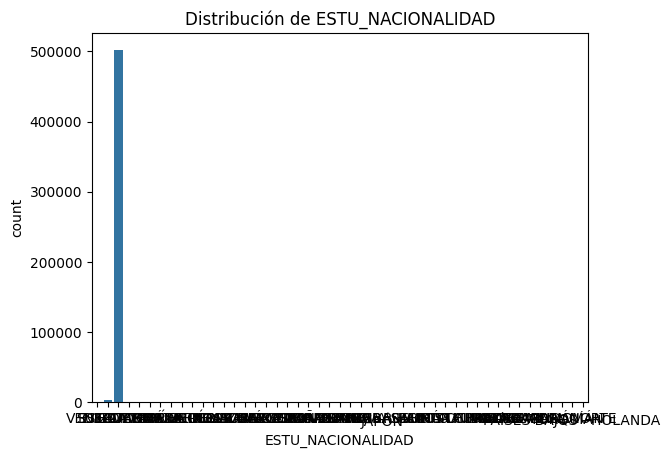

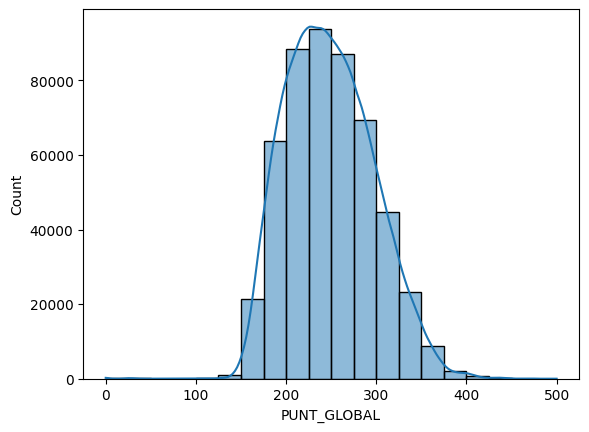

COLE_AREA_UBICACION
RURAL     227.080126
URBANO    252.524819
Name: PUNT_GLOBAL, dtype: float64


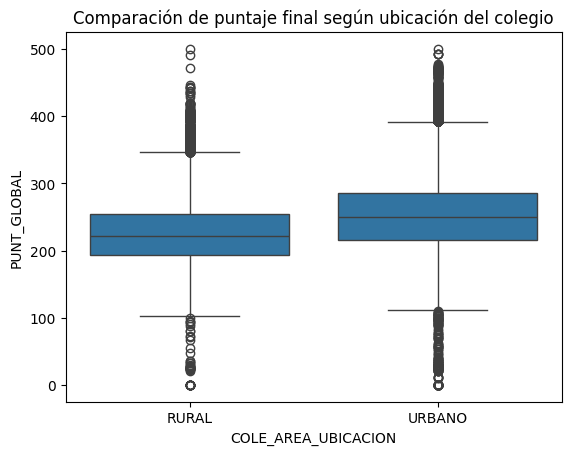

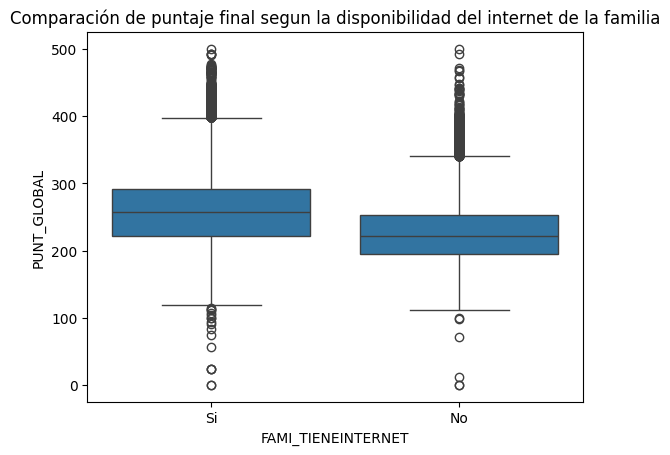

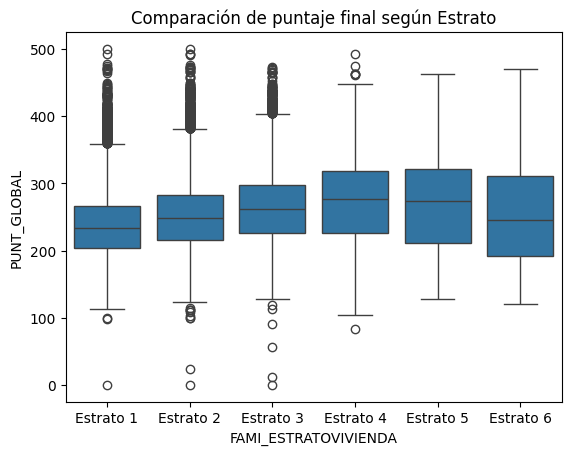

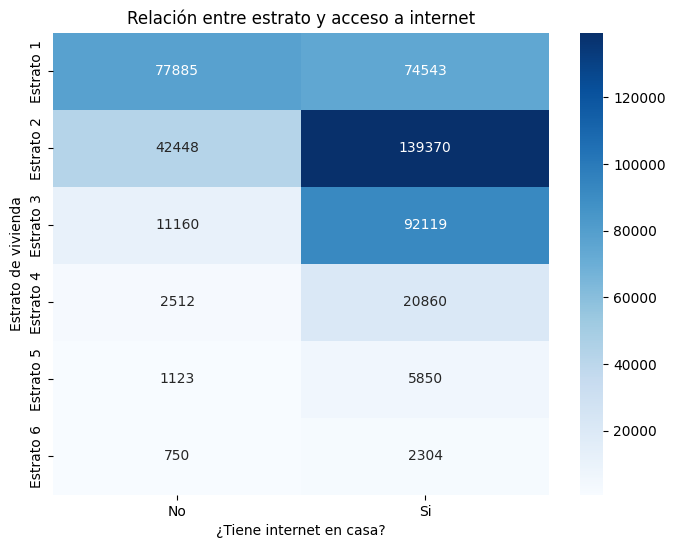

Con gráficas básicas podemos sacar las siguientes conclusiones:
- El 99.3% de los datos provienen de estudiantes con nacionalidad Colombiana, por lo tanto intentar hacer comparaciones con nacionalidades diferentes sería poco preciso.
- La media de puntaje global ronda entre los 200 y 300 puntos.
- Se puede apreciar cómo la ubicación del colegio influye directamente en los resultados de los estudiantes, habiendo una diferencia de más de 20 puntos entre un colegio rural y uno urbano, siendo este último el más alto.
- La disponibilidad de internet en el hogar también está relacionada al puntaje final, siendo más favorable para aquellos que tienen acceso a conexiones de red.
- Gracias a la gráfica de puntaje por estrato se evidencia que en el estrato 4 la media es mayor al resto. Esto nos lleva a la conclusión de que a mayor estrato mejor puntaje; sin embargo, si miramos los estratos 5 y 6 nos damos cuenta de que la media de puntaje es inferior. Tal vez esto se deba a que el grupo de perso

In [37]:
# Implementa tu respuesta en esta celda
import matplotlib.pyplot as plt
import seaborn as sns

print("Resumen del dataset:")
print(df.info())

print("Estadisticas de los datos: ")
print(df.describe())

for col in ["ESTU_NACIONALIDAD"]: 
    print(f"\nDistribución de {col}:")
    print(df[col].value_counts(normalize=True) * 100)  


    sns.countplot(data=df, x=col)
    plt.title(f"Distribución de {col}")
    plt.show()


sns.histplot(df["PUNT_GLOBAL"], bins=20, kde=True)  
plt.show()


media_cole_ubi= df.groupby("COLE_AREA_UBICACION")["PUNT_GLOBAL"].mean()
print (media_cole_ubi)
sns.boxplot(data=df, x="COLE_AREA_UBICACION", y="PUNT_GLOBAL")
plt.title("Comparación de puntaje final según ubicación del colegio")
plt.show()



sns.boxplot(data=df, x="FAMI_TIENEINTERNET", y="PUNT_GLOBAL")
plt.title("Comparación de puntaje final segun la disponibilidad del internet de la familia")
plt.show()

df_filtro_estrato = df[df["FAMI_ESTRATOVIVIENDA"] != "Sin Estrato"]

sns.boxplot(data=df_filtro_estrato, x="FAMI_ESTRATOVIVIENDA", y="PUNT_GLOBAL", order=["Estrato 1","Estrato 2","Estrato 3","Estrato 4","Estrato 5","Estrato 6"])
plt.title("Comparación de puntaje final según Estrato")
plt.show()


tabla = pd.crosstab(df_filtro_estrato["FAMI_ESTRATOVIVIENDA"], df_filtro_estrato["FAMI_TIENEINTERNET"])

# Dibujar heatmap
plt.figure(figsize=(8,6))
sns.heatmap(tabla, annot=True, fmt="d", cmap="Blues")
plt.title("Relación entre estrato y acceso a internet")
plt.ylabel("Estrato de vivienda")
plt.xlabel("¿Tiene internet en casa?")
plt.show()





print("Con gráficas básicas podemos sacar las siguientes conclusiones:")

print("- El 99.3% de los datos provienen de estudiantes con nacionalidad Colombiana, "
      "por lo tanto intentar hacer comparaciones con nacionalidades diferentes sería poco preciso.")

print("- La media de puntaje global ronda entre los 200 y 300 puntos.")

print("- Se puede apreciar cómo la ubicación del colegio influye directamente en los resultados "
      "de los estudiantes, habiendo una diferencia de más de 20 puntos entre un colegio rural y uno urbano, "
      "siendo este último el más alto.")

print("- La disponibilidad de internet en el hogar también está relacionada al puntaje final, "
      "siendo más favorable para aquellos que tienen acceso a conexiones de red.")

print("- Gracias a la gráfica de puntaje por estrato se evidencia que en el estrato 4 la media es mayor al resto. "
      "Esto nos lleva a la conclusión de que a mayor estrato mejor puntaje; sin embargo, si miramos los estratos 5 y 6 "
      "nos damos cuenta de que la media de puntaje es inferior. Tal vez esto se deba a que el grupo de personas "
      "pertenecientes a estos estratos es menor, por lo tanto la muestra es reducida.")

print("\nCONCLUSIONES")

print("- El lugar de ubicación del colegio está directamente relacionado con la media del puntaje global, "
      "por lo tanto sí existe un impacto con respecto a esta variable.")

print("- Asimismo, el acceso a internet también influye en el resultado del examen. "
      "Además, junto con la gráfica comparativa entre estrato y conexión a internet se evidencia que en los estratos "
      "más bajos hay más hogares sin conexión a internet, lo cual es otro factor que actúa directamente en los "
      "resultados por estratos de la prueba.")



## Fase 3: abordar relación variables-desempeño a través de un modelo

En esta fase propondrás, implementarás y reportarás el desempeño de uno o más modelos (al menos uno predictivo) que busquen explicar las relaciones entre factores sociodemográficos y el desempeño en la prueba. Además, concluirás con respecto a la validez de al menos un modelo y los posibles hallazgos que se podrían reportar para el *stakeholder*.

Pautas generales:

* Seleccionar variables y proponer modelos acordes a estas y al contexto del problema.
* Utilizar librerías especializadas (ej., `statsmodels`, `sklearn`, etc.) para indagar sobre los aspectos que contribuyen al éxito de los estudiantes. Los módulos correspondientes a regresión lineal y regresión logística pueden ser útiles.
* Asegurar el cumplimiento de los supuestos y buenas prácticas de cada modelo.
* Utilizar las métricas de evaluación de desempeño (disponibles en las librerías especilizadas), para concluir sobre la validez de los modelos propuestos.

Preguntas guía:

* ¿Existe algún sub-conjunto de variables socio-demográficas que explique razonablemente bien el desempeño de los estudiantes en la prueba?

In [ ]:
# Implementa tu respuesta en esta celda
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import numpy as np


variables = [
    "PUNT_GLOBAL",                
    "FAMI_TIENEINTERNET",
    "FAMI_TIENESERVICIOTV",
    "FAMI_TIENECOMPUTADOR",
    "FAMI_TIENELAVADORA",
    "FAMI_TIENEHORNOMICROOGAS",
    "FAMI_TIENEAUTOMOVIL",
    "FAMI_TIENEMOTOCICLETA",
    "FAMI_TIENECONSOLAVIDEOJUEGOS",
    "FAMI_NUMLIBROS",
    "ESTU_DEDICACIONLECTURADIARIA",
    "ESTU_DEDICACIONINTERNET",
    "ESTU_HORASSEMANATRABAJA",
    "ESTU_TIPOREMUNERACION",
    "COLE_GENERO",
    "FAMI_ESTRATOVIVIENDA",
    "COLE_AREA_UBICACION",
    "FAMI_SITUACIONECONOMICA",
    "ESTU_GENERO"
    
]

df_modelo = df_filtro_estrato[variables].copy()


df_modelo = pd.get_dummies(df_modelo, drop_first=True)


X = df_modelo.drop("PUNT_GLOBAL", axis=1)
y = df_modelo["PUNT_GLOBAL"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

mse_lr = mean_squared_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mse_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print("Resultados del modelo Regresión Lineal:")
print(f"R²: {r2_lr:.3f}")
print(f"RMSE: {rmse_lr:.3f}")

coeficientes = pd.DataFrame({
    "Variable": X.columns,
    "Coeficiente": lr.coef_
}).sort_values(by="Coeficiente", ascending=False)

print("\nCoeficientes de la regresión lineal:")
print(coeficientes.head(10))

print("\nConclusiones del modelo de Regresión Lineal Múltiple:")
print("------------------------------------------------------")
print("1. Tener más libros en casa, contar con computador e internet,")
print("   y dedicar más tiempo a la lectura se asocian con mejores puntajes globales.")
print("2. El estrato socioeconómico y el género muestran relación, pero con un impacto menor.")
print("3. El modelo logra explicar solo una parte de la variabilidad en los puntajes,")
print("   lo que sugiere que el desempeño académico depende también de otros factores no incluidos.")





Resultados del modelo Regresión Lineal:
R²: 0.243
RMSE: 42.162

Coeficientes de la regresión lineal:
                                             Variable  Coeficiente
10                   FAMI_NUMLIBROS_MÁS DE 100 LIBROS    20.132438
9                      FAMI_NUMLIBROS_26 A 100 LIBROS    18.599907
13        ESTU_DEDICACIONLECTURADIARIA_Más de 2 horas    13.102976
2                             FAMI_TIENECOMPUTADOR_Si    11.135953
36                                      ESTU_GENERO_M    10.382872
30                     FAMI_ESTRATOVIVIENDA_Estrato 4     9.615779
0                               FAMI_TIENEINTERNET_Si     8.655002
35                       FAMI_SITUACIONECONOMICA_Peor     8.363866
12  ESTU_DEDICACIONLECTURADIARIA_Entre 30 y 60 min...     8.285727
17             ESTU_DEDICACIONINTERNET_Más de 3 horas     8.113537

Conclusiones del modelo de Regresión Lineal Múltiple:
------------------------------------------------------
1. Tener más libros en casa, contar con computador e

## Fase 4

Deberás elegir y realizar una de las dos alternativas que se encuentran a continuación.

### Alternativa 1: desarrollar una herramienta interactiva de análisis

En esta fase desarrollarás, a partir de alguno de los análisis realizados, una herramienta interactiva que sea relevante en el contexto del problema, acompañada de las instrucciones necesarias para que un usuario la pueda utilizar.

Pautas generales:

* Seleccionar uno de los análisis previos que pueda verse enriquecido con alguna característica de interactividad.
* Seleccionar el/los parámetro(s) que el usuario podrá cambiar.
* Desarrollar las funciones que se deben ejecutar con cada acción del usuario.
* Utilizar una librería especializada (ej., `ipywidgets`, `panel`, etc.) para implementar la herramienta.

Preguntas guía:

* ¿Cuál o cuáles preguntas podrá hacerle el usuario a la herramienta y cómo aporta la respuesta al análisis?
* ¿Qué aprendizajes clave puede explorar u obtener el usuario con esta herramienta?

In [ ]:
# Implementa tu respuesta en esta celda}


### Alternativa 2: registrar en bases de datos relacionales con PySpark

En esta fase desarrollarás, a partir de alguno de los análisis realizados, un _script_ que sea relevante en el contexto del problema, acompañado de las instrucciones necesarias para que un usuario lo pueda ejecutar.

Pautas generales:

* Cargar en una base de datos relacional (tipo SQL) el segmento de los datos sobre el cual profundizaste en tu anális, utilizando una tabla distinta para cada categoría de campos. Por ejemplo, una categoría puedes ser información del colegio; en cuyo caso, una tabla debería contener un registro único para cada colegio y todos los campos asociados.

* Los campos, a excepción de los identificadores, deben existir en un única tabla.

* Cada registro debe existir una única vez en su respectiva tabla.

* Cada registro debe tener un identificador único en su tabla, el cual establece una relación entre tablas.

* Seleccionar uno de los modelos predictivos implementados.

* Crear en la base de datos relacional una tabla que contenga únicamente los identificadores del registro y la predicción de la variable de respuesta hecha por el modelo.

* Desarrollar _queries_ de SQL según las siguientes indicaciones y concluir acerca de los resultados:
    * Un _query_ que seleccione todos registros y los agregue en una única tabla. Para esto debes relacionar las tablas por su identificador, utilizando el método `JOIN`.
    * Un _query_ que contenga el puntaje promedio de los estudiantes, agrupado por año y por colegio.
    * Distintos _queries_ que calculen medidas de error de predicción del modelo a partir de los datos reales y las predicciones respectivas. Debes reportar el error para cada registro, el error total de los registros de entrenamiento y el error total de los registros de prueba.
    * Haz dos _queries_ adicionales que resulten interesantes.

Preguntas guía:

* ¿Cómo aporta la segmentación de los datos en categorías de campos al manejo de los datos?
* ¿Qué filtros y agrupaciones podemos aplicar sobre los datos con el fin de obtener información relevante?

In [ ]:
# Implementa tu respuesta en esta celda


## Referencias

*  J. VanderPlas (2016) *Python Data Science Handbook: Essential Tools for Working with Data* O'Reilly Media, Inc.
*  scikit-learn developers . (2020). Demo of DBSCAN clustering algorithm. 11 Diciembre 2020, de scikit-learn <br> https://scikit-learn.org/stable/auto_examples/cluster/plot_dbscan.html#sphx-glr-auto-examples-cluster-plot-dbscan-py

## Créditos

__Autores__: Camilo Hernando Gómez Castro, Alejandro Mantilla Redondo, Jose Fernando Barrera de Plaza, Diego Alejandro Cely Gómez.

__Fecha última actualización__: 29/09/2022